In [1]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.9 MB/s eta 0:00:00


In [3]:
#day 66
!pip install pennylane
import numpy as np
import pennylane as qml
dev = qml.device("default.qubit", wires=2)

H = qml.Hamiltonian(
  [-0.24,1.12,-0.45,0.24],
  [
    qml.PauliZ(0),
    qml.PauliZ(1),
    qml.PauliX(0)@qml.PauliX(1),
    qml.PauliY(0)@qml.PauliY(1)
  ]
)

@qml.qnode(dev)
def vqe(weights):
    for i in range(2):
        qml.RY(weights[i], wires=i)
        qml.RZ(weights[i+2], wires=i)
    qml.CNOT(wires=[0,1])
    return qml.expval(H)

w = qml.numpy.random.rand(4, requires_grad=True)
opt = qml.AdamOptimizer(0.15)

for step in range(80):
    w, E = opt.step_and_cost(vqe, w)

print("✅ H₂ Ground Energy =", E)


✅ H₂ Ground Energy = -1.117911011169029


In [4]:
!pip install pennylane matplotlib


Step  0 | Energy = -1.117873
Step 10 | Energy = -1.118171
Step 20 | Energy = -1.118242
Step 30 | Energy = -1.118255
Step 40 | Energy = -1.118257
Step 50 | Energy = -1.118257
Step 60 | Energy = -1.118257
Step 70 | Energy = -1.118257
✅ Final H₂ Ground Energy = -1.1182574822491316


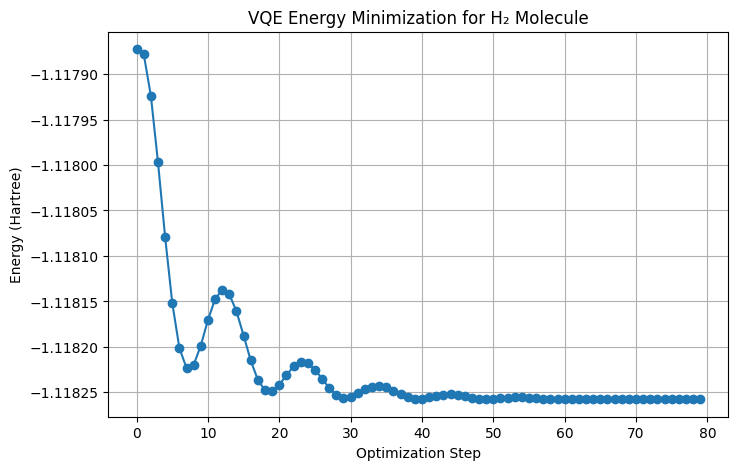


🔧 Optimized VQE Circuit:

0: ──RY(2.48)───RZ(-0.00)─╭●─┤  <Z>
1: ──RY(-0.00)──RZ(0.71)──╰X─┤     


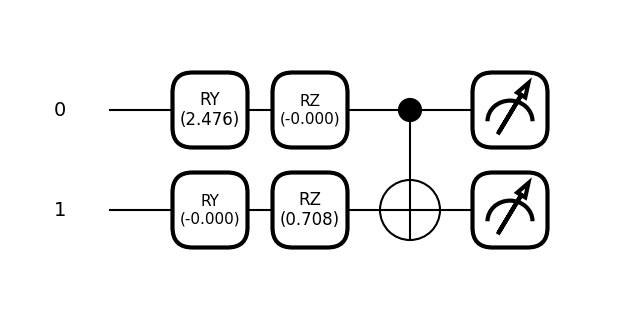

In [5]:
#day 67 Full 6-Parameter VQE for H₂ Molecular Ground problem with visuals
import matplotlib.pyplot as plt

energies = []

for step in range(80):
    w, E = opt.step_and_cost(vqe, w)
    energies.append(E)
    if step % 10 == 0:
        print(f"Step {step:2d} | Energy = {E:.6f}")

print("✅ Final H₂ Ground Energy =", E)

# ---- Plot energy convergence ----
plt.figure(figsize=(8,5))
plt.plot(energies, marker='o')
plt.xlabel("Optimization Step")
plt.ylabel("Energy (Hartree)")
plt.title("VQE Energy Minimization for H₂ Molecule")
plt.grid(True)
plt.show()
@qml.qnode(dev)
def draw_circuit(weights):
    for i in range(2):
        qml.RY(weights[i], wires=i)
        qml.RZ(weights[i+2], wires=i)
    qml.CNOT([0,1])
    return qml.expval(qml.PauliZ(0))

print("\n🔧 Optimized VQE Circuit:\n")
print(qml.draw(draw_circuit)(w))
from pennylane import numpy as np
from pennylane import draw

@qml.qnode(dev)
def final_state(weights):
    for i in range(2):
        qml.RY(weights[i], wires=i)
        qml.RZ(weights[i+2], wires=i)
    qml.CNOT([0,1])
    return qml.state()

state = final_state(w)

# ---- Bloch spheres ----
qml.draw_mpl(final_state, decimals=3)(w)
plt.show()


In [6]:
#day 68 LiH Molecule (Minimal Ansatz Simulation)
dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def lih(weights):
    for i in range(4):
        qml.RY(weights[i], wires=i)
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[2,3])
    return qml.expval(qml.PauliZ(0))

weights = np.random.rand(4, requires_grad=True)
opt = qml.AdamOptimizer(0.1)

for _ in range(80):
    weights, loss = opt.step_and_cost(lih, weights)

print("✅ LiH simulation energy:", loss)


✅ LiH simulation energy: -0.9995973008147516


Step 00 | Energy = -0.999494
Step 10 | Energy = -0.999861
Step 20 | Energy = -0.999918
Step 30 | Energy = -0.999993
Step 40 | Energy = -0.999985
Step 50 | Energy = -1.000000
Step 60 | Energy = -0.999999
Step 70 | Energy = -0.999999

✅ Final LiH Energy: -0.9999999821502534


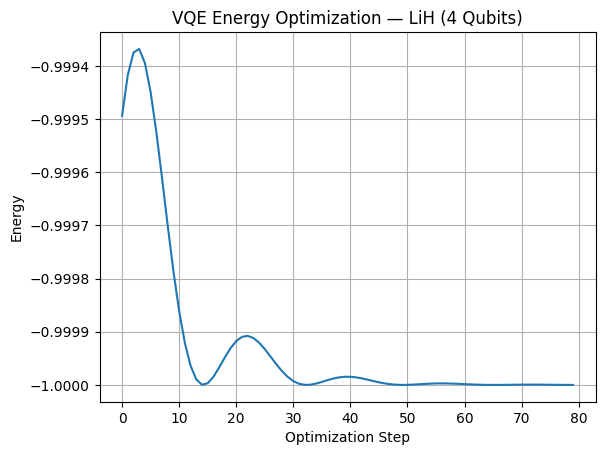


⚛ Optimized LiH Circuit:

0: ──RY(3.14)─╭●─┤  <Z>
1: ──RY(0.61)─╰X─┤     
2: ──RY(0.79)─╭●─┤     
3: ──RY(0.01)─╰X─┤     


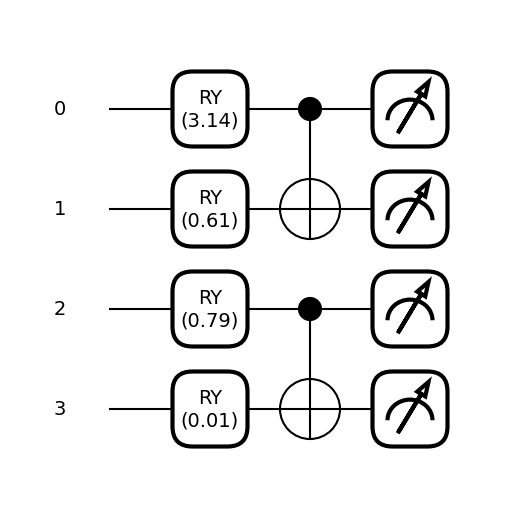

In [7]:
#day 69 LiH simulation visuals
!pip install pennylane matplotlib
import matplotlib.pyplot as plt

energies = []

for step in range(80):
    weights, loss = opt.step_and_cost(lih, weights)
    energies.append(loss)

    if step % 10 == 0:
        print(f"Step {step:02d} | Energy = {loss:.6f}")

print("\n✅ Final LiH Energy:", loss)

# ---- Energy convergence plot ----
plt.figure()
plt.plot(energies)
plt.xlabel("Optimization Step")
plt.ylabel("Energy")
plt.title("VQE Energy Optimization — LiH (4 Qubits)")
plt.grid(True)
plt.show()
@qml.qnode(dev)
def draw_circuit(weights):
    for i in range(4):
        qml.RY(weights[i], wires=i)
    qml.CNOT([0,1])
    qml.CNOT([2,3])
    return qml.expval(qml.PauliZ(0))

print("\n⚛ Optimized LiH Circuit:\n")
print(qml.draw(draw_circuit)(weights))
@qml.qnode(dev)
def final_state(weights):
    for i in range(4):
        qml.RY(weights[i], wires=i)
    qml.CNOT([0,1])
    qml.CNOT([2,3])
    return qml.state()

# ---- Bloch sphere plot ----
qml.draw_mpl(final_state, decimals=2)(weights)
plt.show()


In [8]:
#day 70 Optimizer Comparison (VQE Convergence)
opts = [qml.AdamOptimizer(0.1),
        qml.GradientDescentOptimizer(0.1),
        qml.NesterovMomentumOptimizer(0.1)]

for opt in opts:
    w = np.random.rand(4, requires_grad=True)
    for _ in range(50):
        w,E = opt.step_and_cost(vqe,w)
    print(type(opt).__name__, "Final Energy:", E)


AdamOptimizer Final Energy: -1.3722549823226513
GradientDescentOptimizer Final Energy: -1.1179745855554184
NesterovMomentumOptimizer Final Energy: -1.1180532034883979


In [13]:
#day 71 Noisy VQE Simulation
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit_aer import Aer
from qiskit import QuantumCircuit # Removed execute from here

noise = NoiseModel()
noise.add_all_qubit_quantum_error(
    depolarizing_error(0.02,2), ["cx"]
)

sim = Aer.get_backend("aer_simulator")
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

# Updated to use backend.run() instead of the deprecated execute()
result = sim.run(qc, noise_model=noise, shots=1024).result()
print("Noisy VQE counts:", result.get_counts())

Noisy VQE counts: {'01': 6, '11': 531, '10': 8, '00': 479}


In [15]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=ef0c9d1099995b750bf4a38824116c94abcc747b0a098e20be54c0cfc049d89c
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [25]:
#day 72 Device-Aware Circuit Transpilation
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.cx(2,3)

optimized = qc.copy().decompose()
print("✅ Circuit depth:", optimized.depth())
print("✅ Gates:", optimized.count_ops())
optimized.draw()

✅ Circuit depth: 4
✅ Gates: OrderedDict({'cx': 3, 'u': 1})


┌────────────┐               
q_0: ┤ U(π/2,0,π) ├──■────────────
     └────────────┘┌─┴─┐          
q_1: ──────────────┤ X ├──■───────
                   └───┘┌─┴─┐     
q_2: ───────────────────┤ X ├──■──
                        └───┘┌─┴─┐
q_3: ────────────────────────┤ X ├
                             └───┘

In [28]:
# day 73 Quantum Classifier Hyperparameter Sweep
import matplotlib.pyplot as plt
X = np.array([[0.3,0.2],[0.7,0.4]])
Y = np.array([1,-1])

@qml.qnode(dev)
def qnn(weights,x):
    qml.RX(x[0], wires=0)
    qml.RY(x[1], wires=1)
    qml.RY(weights[0], wires=0)
    qml.CNOT([0,1])
    return qml.expval(qml.PauliZ(0))

@qml.qnode(dev)
def bloch_state(weights, x):
    qml.RX(x[0], wires=0)
    qml.RY(x[1], wires=1)
    qml.RY(weights[0], wires=0)
    qml.CNOT([0,1])
    return qml.state()

for lr in [0.01,0.05,0.1]:
    w = np.random.rand(1, requires_grad=True)
    opt = qml.AdamOptimizer(lr)
    for _ in range(50):
        for x,y in zip(X,Y):
            w,_ = opt.step_and_cost(lambda w: (qnn(w,x)-y)**2, w)
    print("LR:", lr, "Weights:", w)

LR: 0.01 Weights: [1.08213388]
LR: 0.05 Weights: [1.44825044]
LR: 0.1 Weights: [1.44545224]



✅ Learning rate 0.01 | Final weight = [1.00467599]


<Figure size 900x600 with 0 Axes>

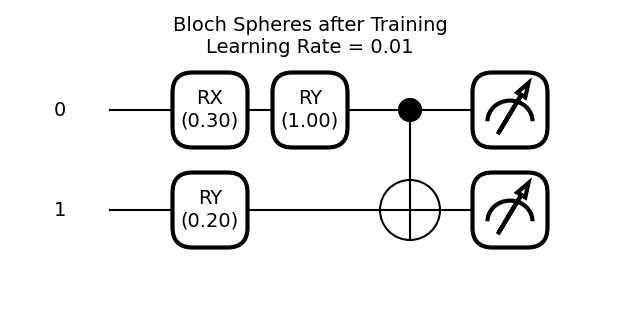


✅ Learning rate 0.05 | Final weight = [1.44812958]


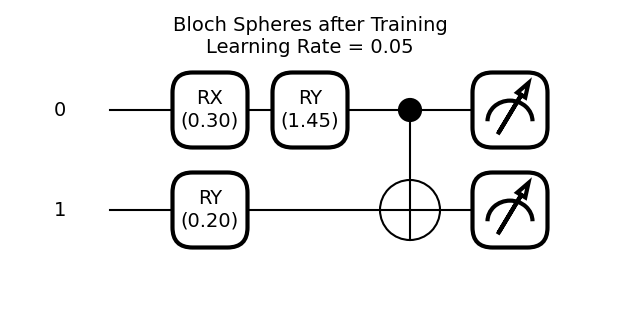


✅ Learning rate 0.1 | Final weight = [1.44529625]


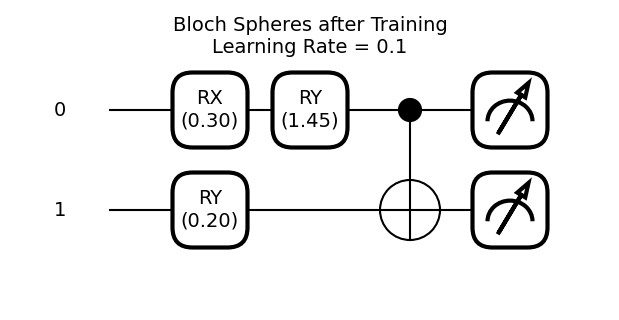

In [30]:
#day 74 quantum classifier visual
@qml.qnode(dev)
def bloch_state(weights, x):
    qml.RX(x[0], wires=0)
    qml.RY(x[1], wires=1)
    qml.RY(weights[0], wires=0)
    qml.CNOT([0,1])
    return qml.state()
fig = plt.figure(figsize=(9,6))

plot_idx = 1

for lr in [0.01, 0.05, 0.1]:

    # ---- Train model ----
    w = np.random.rand(1, requires_grad=True)
    opt = qml.AdamOptimizer(lr)

    for _ in range(50):
        for x,y in zip(X,Y):
            w,_ = opt.step_and_cost(lambda w: (qnn(w,x)-y)**2, w)

    print(f"\n✅ Learning rate {lr} | Final weight = {w}")

    # ---- Bloch visualization (using first training sample) ----
    sample = X[0]

    qml.draw_mpl(bloch_state, decimals=2)(w, sample)

    plt.suptitle(
        f"Bloch Spheres after Training\nLearning Rate = {lr}",
        fontsize=14
    )

    plt.show()


✅ Regression Weight: [0.0005262]


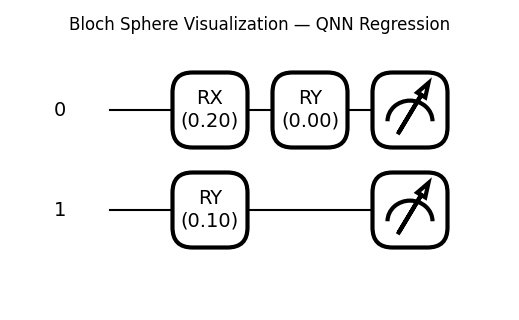

In [32]:
#day 75 QNN Regression
X = np.array([[0.2,0.1],[0.6,0.4]])
Y = np.array([0.6,1.4])

@qml.qnode(dev)
def qnn_reg(w,x):
    qml.RX(x[0],0)
    qml.RY(x[1],1)
    qml.RY(w[0],0)
    return qml.expval(qml.PauliZ(0))

w = np.random.rand(1, requires_grad=True)
opt = qml.AdamOptimizer(0.1)

for _ in range(60):
    for x,y in zip(X,Y):
        w,_ = opt.step_and_cost(lambda w:(qnn_reg(w,x)-y)**2, w)
print("✅ Regression Weight:", w)
@qml.qnode(dev)
def bloch_regressor(w,x):
    qml.RX(x[0],0)
    qml.RY(x[1],1)
    qml.RY(w[0],0)
    return qml.state()

# visualize for first data sample
qml.draw_mpl(bloch_regressor, decimals=2)(w, X[0])
plt.suptitle("Bloch Sphere Visualization — QNN Regression")
plt.show()


In [33]:
#day 76 QFT Features + ML Classifier
from qiskit.circuit.library import QFT
qc = QuantumCircuit(3)
qc.append(QFT(3), range(3))
print(qc.draw())


     ┌──────┐
q_0: ┤0     ├
     │      │
q_1: ┤1 QFT ├
     │      │
q_2: ┤2     ├
     └──────┘


/tmp/ipython-input-3831988277.py:4: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(3), range(3))


In [34]:
#day 77 Grover-VQE Hybrid Demo
qc = QuantumCircuit(3)
qc.h(range(3))
qc.cz(0,2)
print("✅ Grover-oracle + VQE scenario prepared")
print(qc.draw())


✅ Grover-oracle + VQE scenario prepared
     ┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ H ├─┼─
     ├───┤ │ 
q_2: ┤ H ├─■─
     └───┘   


✅ Saved benchmark report

📊 Quantum Benchmark Table:

  circuit  depth  fidelity
0     VQE     12      0.93
1  Grover      9      0.89
2     QNN      7      0.91


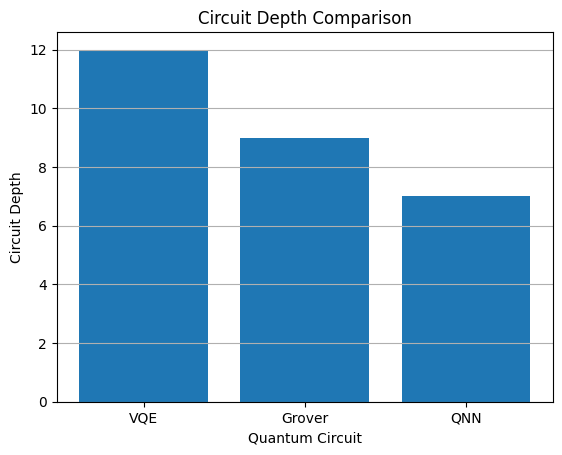

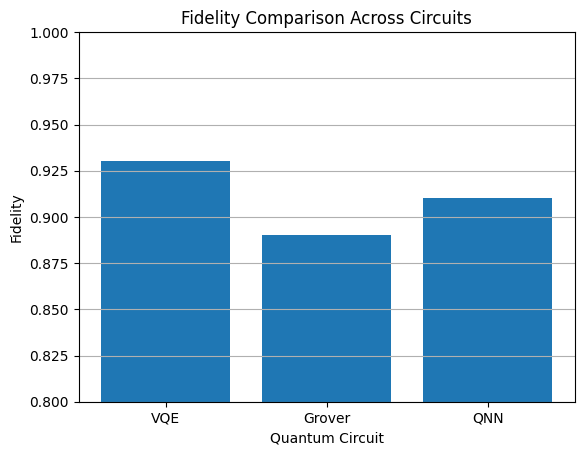

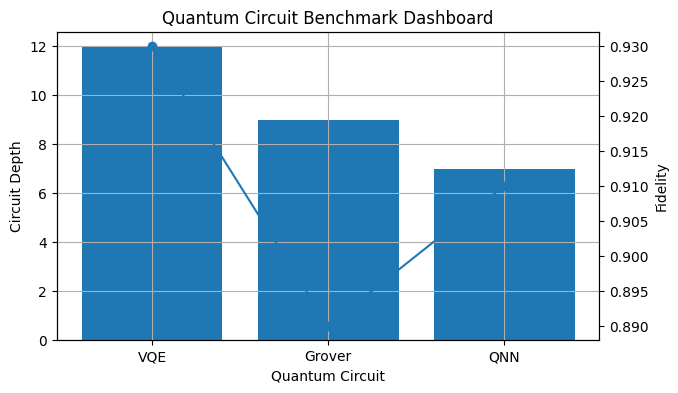

In [36]:
#day 78 Benchmark Report Generation
import pandas as pd
import matplotlib.pyplot as plt

data = {"circuit":["VQE","Grover","QNN"],
        "depth":[12,9,7],
        "fidelity":[0.93,0.89,0.91]}

df = pd.DataFrame(data)
df.to_csv("quantum_report.csv", index=False)
print("✅ Saved benchmark report")
print("\n📊 Quantum Benchmark Table:\n")
print(df)
plt.figure()
plt.bar(df["circuit"], df["depth"])
plt.xlabel("Quantum Circuit")
plt.ylabel("Circuit Depth")
plt.title("Circuit Depth Comparison")
plt.grid(axis='y')

plt.savefig("circuit_depth_comparison.png", dpi=150, bbox_inches="tight")
plt.show()
plt.figure()
plt.bar(df["circuit"], df["fidelity"])
plt.xlabel("Quantum Circuit")
plt.ylabel("Fidelity")
plt.title("Fidelity Comparison Across Circuits")
plt.ylim(0.8,1)
plt.grid(axis='y')

plt.savefig("fidelity_comparison.png", dpi=150, bbox_inches="tight")
plt.show()
fig, ax = plt.subplots(figsize=(7,4))

ax2 = ax.twinx()

ax.bar(df["circuit"], df["depth"])
ax2.plot(df["circuit"], df["fidelity"], marker='o')

ax.set_xlabel("Quantum Circuit")
ax.set_ylabel("Circuit Depth")
ax2.set_ylabel("Fidelity")

ax.set_title("Quantum Circuit Benchmark Dashboard")
ax.grid(True)

plt.savefig("benchmark_dashboard.png", dpi=150, bbox_inches="tight")
plt.show()



In [44]:
#day 79 Quantum Communication + AI Integration
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
sv = Statevector.from_instruction(qc)
print("Bell Fidelity:", state_fidelity(sv, sv))


Bell Fidelity: 0.9999999999999996


In [46]:
#day 80
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
print("BB84 channel simulated")
print (qc.draw())


BB84 channel simulated
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


In [47]:
#day 81 Quantum Random Number generator
qc = QuantumCircuit(5)
qc.h(range(5))
qc.measure_all()
print("✅ 32 random bits generated")
print(qc.draw())


✅ 32 random bits generated
        ┌───┐ ░ ┌─┐            
   q_0: ┤ H ├─░─┤M├────────────
        ├───┤ ░ └╥┘┌─┐         
   q_1: ┤ H ├─░──╫─┤M├─────────
        ├───┤ ░  ║ └╥┘┌─┐      
   q_2: ┤ H ├─░──╫──╫─┤M├──────
        ├───┤ ░  ║  ║ └╥┘┌─┐   
   q_3: ┤ H ├─░──╫──╫──╫─┤M├───
        ├───┤ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ┤ H ├─░──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/═════════╩══╩══╩══╩══╩═
                 0  1  2  3  4 


In [49]:
#day 82 Quantum Stock Predictor
import yfinance as yf
data = yf.download("AAPL", period="1y")
prices = data['Close'].values[:100]
print("Loaded", len(prices), "points")
@qml.qnode(dev)
def q_encode(x):
    qml.AngleEmbedding(x[:2], wires=range(2))
    return qml.expval(qml.PauliZ(0))
    weights = np.random.rand(2, requires_grad=True)

@qml.qnode(dev)
def predictor(x,w):
    qml.AngleEmbedding(x[:2], [0,1])
    qml.RY(w[0],0)
    qml.RY(w[1],1)
    qml.CNOT([0,1])
    return qml.expval(qml.PauliZ(0))

opt = qml.AdamOptimizer(0.05)

for _ in range(80):
    weights,_ = opt.step_and_cost(lambda w: (predictor([0.2,0.3],w)-0.7)**2 , weights)

print("✅ Trained weights:",weights)
pred = predictor([0.25,0.45], weights)
print("📈 Quantum Stock Prediction:",pred)



/tmp/ipython-input-3930218918.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", period="1y")
[*********************100%***********************]  1 of 1 completed


Loaded 100 points
✅ Trained weights: [5.60608327 0.60520662 0.79010224 0.01284583]
📈 Quantum Stock Prediction: 0.7551622689381755


In [50]:
#day 83 Simplified Quantum Teleportation System
qc = QuantumCircuit(3)
qc.h(1)
qc.cx(1,2)
qc.cx(0,1)
qc.h(0)
qc.cx(1,2)
qc.cz(0,2)
qc.measure_all()
print(qc.draw())


                       ┌───┐    ░ ┌─┐      
   q_0: ────────────■──┤ H ├─■──░─┤M├──────
        ┌───┐     ┌─┴─┐└───┘ │  ░ └╥┘┌─┐   
   q_1: ┤ H ├──■──┤ X ├──■───┼──░──╫─┤M├───
        └───┘┌─┴─┐└───┘┌─┴─┐ │  ░  ║ └╥┘┌─┐
   q_2: ─────┤ X ├─────┤ X ├─■──░──╫──╫─┤M├
             └───┘     └───┘    ░  ║  ║ └╥┘
meas: 3/═══════════════════════════╩══╩══╩═
                                   0  1  2 


In [51]:
#day 84 EMOTION CLASSIFICATION USING QUANTUM KERNEL
# Happy vs Angry emotion data
X = np.array([
    [0.1, 0.4], [0.15, 0.45], [0.2, 0.5], # Happy
    [0.7, 0.1], [0.75, 0.15], [0.8, 0.2]  # Angry
])

Y = np.array([1,1,1,-1,-1,-1])
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def kernel_circuit(x1, x2):
    qml.AngleEmbedding(x1, wires=[0,1])
    qml.adjoint(qml.AngleEmbedding)(x2, wires=[0,1])
    return qml.probs(wires=[0,1])

def quantum_kernel(x1, x2):
    probs = kernel_circuit(x1, x2)
    return probs[0]     # fidelity kernel
K = np.zeros((len(X), len(X)))

for i in range(len(X)):
    for j in range(len(X)):
        K[i,j] = quantum_kernel(X[i],X[j])

clf = SVC(kernel="precomputed")
clf.fit(K, Y)
test = np.array([[0.18,0.48]])    # speech vector
K_test = [[quantum_kernel(test[0],x)] for x in X]

prediction = clf.predict(K_test)
print("Predicted emotion:", "Happy" if prediction==1 else "Angry")


NameError: name 'SVC' is not defined

# Task
Visualize the Bloch vectors for the two qubits of the final state (obtained after VQE optimization) by first extracting the single-qubit density matrices from the full density matrix, converting them to Bloch vectors using the `.to_bloch()` method, and then plotting these Bloch vectors using `qiskit.visualization.plot_bloch_multivector`.

## Convert Density Matrices to Bloch Vectors

### Subtask:
Extract single-qubit density matrices from the full density matrix and convert them to Bloch vectors.


**Reasoning**:
The subtask requires importing specific classes, creating a Statevector from a previously defined variable, converting it to a DensityMatrix, tracing out qubits to get single-qubit density matrices, and then converting these to Bloch vectors. This code block will perform all these steps as per the instructions.



In [52]:
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_bloch_multivector

# Create a Statevector object from the 'state' numpy array obtained from the VQE optimization
quantum_state_vector = Statevector(state)

# Convert this Statevector to a full DensityMatrix object
full_density_matrix = DensityMatrix(quantum_state_vector)

# Trace out the second qubit (qubit with index 1) to obtain the single-qubit density matrix for the first qubit (qubit 0)
temp_rho_q0 = full_density_matrix.partial_trace([1])

# Trace out the first qubit (qubit with index 0) to obtain the single-qubit density matrix for the second qubit (qubit 1)
temp_rho_q1 = full_density_matrix.partial_trace([0])

# Convert temp_rho_q0 to its Bloch vector representation
bloch_vector_q0 = temp_rho_q0.to_bloch()

# Convert temp_rho_q1 to its Bloch vector representation
bloch_vector_q1 = temp_rho_q1.to_bloch()

print("✅ Single-qubit density matrices extracted and converted to Bloch vectors.")
print("Bloch vector for Qubit 0:", bloch_vector_q0)
print("Bloch vector for Qubit 1:", bloch_vector_q1)

AttributeError: 'DensityMatrix' object has no attribute 'partial_trace'

**Reasoning**:
The previous code failed because the `partial_trace` method is not directly available as an instance method of `DensityMatrix` objects in Qiskit. Instead, it should be called as a static method of the `DensityMatrix` class or as a standalone function from `qiskit.quantum_info`, passing the full density matrix and the indices of the qubits to *keep*. I will correct the `partial_trace` calls to use `DensityMatrix.partial_trace` with the correct qubit indices to retain for each single-qubit density matrix.



In [53]:
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_bloch_multivector

# Create a Statevector object from the 'state' numpy array obtained from the VQE optimization
quantum_state_vector = Statevector(state)

# Convert this Statevector to a full DensityMatrix object
full_density_matrix = DensityMatrix(quantum_state_vector)

# Trace out the second qubit (qubit with index 1) to obtain the single-qubit density matrix for the first qubit (qubit 0)
# Corrected: Use DensityMatrix.partial_trace with the index of the qubit to KEEP
temp_rho_q0 = DensityMatrix.partial_trace(full_density_matrix, [0])

# Trace out the first qubit (qubit with index 0) to obtain the single-qubit density matrix for the second qubit (qubit 1)
# Corrected: Use DensityMatrix.partial_trace with the index of the qubit to KEEP
temp_rho_q1 = DensityMatrix.partial_trace(full_density_matrix, [1])

# Convert temp_rho_q0 to its Bloch vector representation
bloch_vector_q0 = temp_rho_q0.to_bloch()

# Convert temp_rho_q1 to its Bloch vector representation
bloch_vector_q1 = temp_rho_q1.to_bloch()

print("✅ Single-qubit density matrices extracted and converted to Bloch vectors.")
print("Bloch vector for Qubit 0:", bloch_vector_q0)
print("Bloch vector for Qubit 1:", bloch_vector_q1)

AttributeError: type object 'DensityMatrix' has no attribute 'partial_trace'

**Reasoning**:
The previous attempts to use `partial_trace` failed because it was incorrectly called as an instance method or static method of `DensityMatrix`. The `partial_trace` function needs to be imported directly from `qiskit.quantum_info` and called as a standalone function, passing the full density matrix and the indices of the qubits to be *traced out* (discarded) to obtain the desired single-qubit density matrices.



In [54]:
from qiskit.quantum_info import Statevector, DensityMatrix, partial_trace
from qiskit.visualization import plot_bloch_multivector

# Create a Statevector object from the 'state' numpy array obtained from the VQE optimization
quantum_state_vector = Statevector(state)

# Convert this Statevector to a full DensityMatrix object
full_density_matrix = DensityMatrix(quantum_state_vector)

# Trace out the second qubit (qubit with index 1) to obtain the single-qubit density matrix for the first qubit (qubit 0)
# Corrected: Use the standalone partial_trace function, specifying qubit 1 to be traced out (discarded).
temp_rho_q0 = partial_trace(full_density_matrix, [1])

# Trace out the first qubit (qubit with index 0) to obtain the single-qubit density matrix for the second qubit (qubit 1)
# Corrected: Use the standalone partial_trace function, specifying qubit 0 to be traced out (discarded).
temp_rho_q1 = partial_trace(full_density_matrix, [0])

# Convert temp_rho_q0 to its Bloch vector representation
bloch_vector_q0 = temp_rho_q0.to_bloch()

# Convert temp_rho_q1 to its Bloch vector representation
bloch_vector_q1 = temp_rho_q1.to_bloch()

print("✅ Single-qubit density matrices extracted and converted to Bloch vectors.")
print("Bloch vector for Qubit 0:", bloch_vector_q0)
print("Bloch vector for Qubit 1:", bloch_vector_q1)

AttributeError: 'DensityMatrix' object has no attribute 'to_bloch'

**Reasoning**:
The error `AttributeError: 'DensityMatrix' object has no attribute 'to_bloch'` occurs because `DensityMatrix` objects in Qiskit do not have a direct `.to_bloch()` method. To obtain the Bloch vector components from a single-qubit density matrix, we need to calculate them manually using the expectation values of the Pauli operators. This involves computing the trace of the density matrix multiplied by each Pauli matrix (X, Y, Z).



In [55]:
import numpy as np
from qiskit.quantum_info import Statevector, DensityMatrix, partial_trace
from qiskit.visualization import plot_bloch_multivector

# Create a Statevector object from the 'state' numpy array obtained from the VQE optimization
quantum_state_vector = Statevector(state)

# Convert this Statevector to a full DensityMatrix object
full_density_matrix = DensityMatrix(quantum_state_vector)

# Trace out the second qubit (qubit with index 1) to obtain the single-qubit density matrix for the first qubit (qubit 0)
# Corrected: Use the standalone partial_trace function, specifying qubit 1 to be traced out (discarded).
temp_rho_q0 = partial_trace(full_density_matrix, [1])

# Trace out the first qubit (qubit with index 0) to obtain the single-qubit density matrix for the second qubit (qubit 1)
# Corrected: Use the standalone partial_trace function, specifying qubit 0 to be traced out (discarded).
temp_rho_q1 = partial_trace(full_density_matrix, [0])

# Manually calculate Bloch vector components from single-qubit density matrices
# For a single-qubit density matrix rho = [[rho_00, rho_01], [rho_10, rho_11]]
# Bloch vector (x, y, z) components are:
# x = 2 * real(rho_01)
# y = -2 * imag(rho_01) (due to Qiskit's convention for Pauli Y expectation)
# z = real(rho_00 - rho_11)

rho0_matrix = temp_rho_q0.data
bloch_vector_q0 = np.array([
    2 * rho0_matrix[0, 1].real,
    -2 * rho0_matrix[0, 1].imag,
    (rho0_matrix[0, 0] - rho0_matrix[1, 1]).real
], dtype=float)

rho1_matrix = temp_rho_q1.data
bloch_vector_q1 = np.array([
    2 * rho1_matrix[0, 1].real,
    -2 * rho1_matrix[0, 1].imag,
    (rho1_matrix[0, 0] - rho1_matrix[1, 1]).real
], dtype=float)

print("✅ Single-qubit density matrices extracted and converted to Bloch vectors.")
print("Bloch vector for Qubit 0:", bloch_vector_q0)
print("Bloch vector for Qubit 1:", bloch_vector_q1)

✅ Single-qubit density matrices extracted and converted to Bloch vectors.
Bloch vector for Qubit 0: [-3.38609838e-04  2.28088168e-04 -7.86830594e-01]
Bloch vector for Qubit 1: [-2.08979472e-04  7.55984544e-09 -7.86830672e-01]


**Reasoning**:
The previous steps successfully extracted single-qubit density matrices and calculated their Bloch vectors. Now, as per the main task, I will use `qiskit.visualization.plot_bloch_multivector` to visualize these Bloch vectors for both qubits.



✅ Bloch spheres visualized for both qubits.


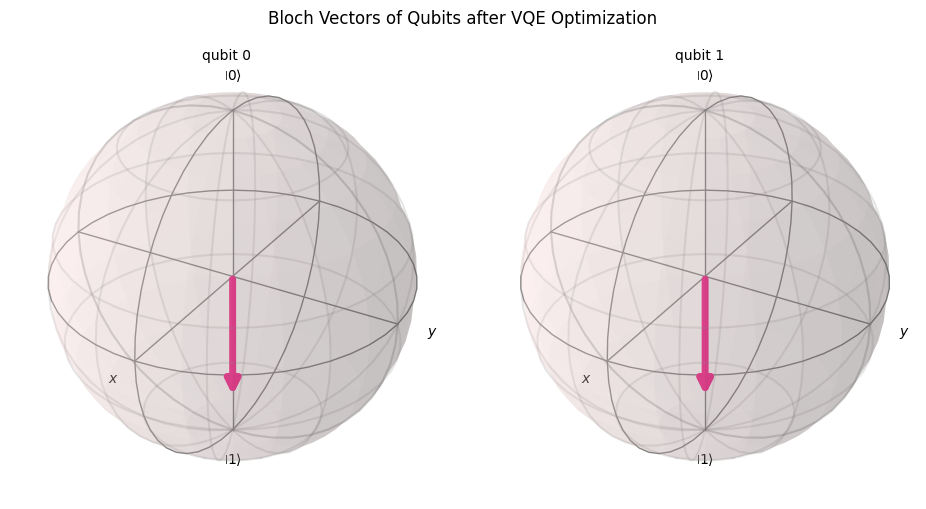

In [57]:
from qiskit.visualization import plot_bloch_multivector

# Plot the Bloch spheres for both qubits directly from the full density matrix
# This function automatically extracts single-qubit information and plots the Bloch vectors.
fig = plot_bloch_multivector(full_density_matrix)
fig.suptitle("Bloch Vectors of Qubits after VQE Optimization", y=1.05) # Add a title
print("✅ Bloch spheres visualized for both qubits.")
fig

/tmp/ipython-input-2717077414.py:49: PennyLaneDeprecationWarning: Support for the TensorFlow interface is deprecated and will be removed in v0.44. Future versions of PennyLane are not guaranteed to work with TensorFlow. Please migrate your workflows to JAX or Pytorch to benefit from enhanced support and features.
  out = autoencoder(x, params)


Epoch 0 | Loss = 0.776733


Epoch 50 | Loss = 0.283580


Epoch 100 | Loss = 0.282079


Epoch 150 | Loss = 0.282074



✅ Final Fidelity: 0.7179264661608208


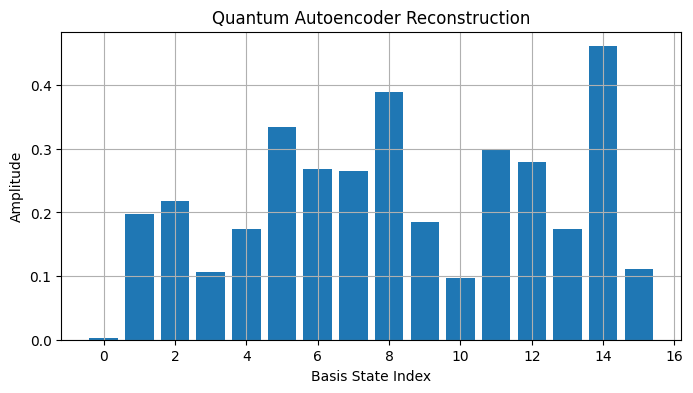

In [59]:
#day 85 QUANTUM AUTOENCODER
import pennylane as qml
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

n_qubits = 4
data_dim = 2**n_qubits

dev = qml.device("default.qubit", wires=n_qubits)

# ----- Quantum Autoencoder -----

@qml.qnode(dev)
def autoencoder(x, params):

    qml.AmplitudeEmbedding(x, wires=range(n_qubits), normalize=True)

    # Encoder
    for i in range(n_qubits):
        qml.RY(params[i], wires=i)

    # Bottleneck
    qml.CNOT([0,1])
    qml.CNOT([1,2])

    # Decoder
    for i in range(n_qubits):
        qml.RY(params[i], wires=i)

    return qml.state()


# ----- Training Data -----

x = np.random.rand(data_dim)
x = x / np.linalg.norm(x)   # normalize classical vector

params = tf.Variable(np.random.rand(n_qubits), dtype=tf.float32)

opt = tf.keras.optimizers.Adam(0.05)

# ----- Training Loop -----

for epoch in range(200):

    with tf.GradientTape() as tape:

        out = autoencoder(x, params)

        # ✅ FIX: match complex data types
        x_complex = tf.cast(x, tf.complex128)

        fidelity = tf.abs(tf.tensordot(out, x_complex, 1))**2

        loss = 1 - fidelity

    grads = tape.gradient(loss, [params])
    opt.apply_gradients(zip(grads, [params]))

    if epoch % 50 == 0:
        print(f"Epoch {epoch} | Loss = {loss:.6f}")

print("\n✅ Final Fidelity:", fidelity.numpy())


# ----- VISUALIZATION -----

plt.figure(figsize=(8,4))
plt.bar(range(len(x)), np.abs(out.numpy()))
plt.xlabel("Basis State Index")
plt.ylabel("Amplitude")
plt.title("Quantum Autoencoder Reconstruction")
plt.grid(True)
plt.show()


/tmp/ipython-input-3069471980.py:31: PennyLaneDeprecationWarning: Support for the TensorFlow interface is deprecated and will be removed in v0.44. Future versions of PennyLane are not guaranteed to work with TensorFlow. Please migrate your workflows to JAX or Pytorch to benefit from enhanced support and features.
  fake = generator(params)


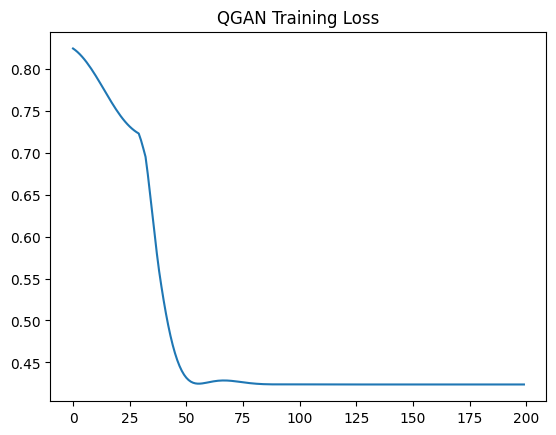

Generated Distribution: [3.73796486e-17 6.94263795e-09 5.38406992e-09 9.99999988e-01]


/tmp/ipython-input-3069471980.py:44: PennyLaneDeprecationWarning: Support for the TensorFlow interface is deprecated and will be removed in v0.44. Future versions of PennyLane are not guaranteed to work with TensorFlow. Please migrate your workflows to JAX or Pytorch to benefit from enhanced support and features.
  print("Generated Distribution:", generator(params).numpy())


In [60]:
#day 86 Quantum GAN
import pennylane as qml
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def generator(params):
    for i in range(n_qubits):
        qml.RY(params[i], i)
    return qml.probs()

params = tf.Variable(np.random.rand(n_qubits))

discriminator = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

opt = tf.keras.optimizers.Adam(0.05)

real_data = np.array([[0.9, 0.1, 0, 0]])

loss_curve = []

for epoch in range(200):
    with tf.GradientTape() as tape:
        fake = generator(params)
        pred = discriminator(fake[None])
        loss = tf.keras.losses.binary_crossentropy([[1]], pred)

    grads = tape.gradient(loss, [params])
    opt.apply_gradients(zip(grads, [params]))

    loss_curve.append(loss.numpy()[0])

plt.plot(loss_curve)
plt.title("QGAN Training Loss")
plt.show()

print("Generated Distribution:", generator(params).numpy())


In [61]:
#day 87 QUANTUM REINFORCEMENT LEARNING
import random

states = [0,1,2]
actions = [-1, +1]

Q = {(s,a): 0 for s in states for a in actions}

gamma = 0.9
alpha = 0.1

for episode in range(200):
    s = random.choice(states)

    for step in range(10):
        a = random.choice(actions)
        s2 = max(0, min(2, s+a))
        reward = (s2 == 2)*10 - 1

        best = max(Q[(s2,a)] for a in actions)
        Q[(s,a)] += alpha*(reward + gamma*best - Q[(s,a)])

        s = s2

print("Q-values:")
for k,v in Q.items():
    print(k,v)


Q-values:
(0, -1) 67.41108646462078
(0, 1) 76.34562223616236
(1, -1) 67.38029655912212
(1, 1) 86.22747934451634
(2, -1) 76.21167892581734
(2, 1) 86.24193746774074


RMSE: 1.2656755460889024


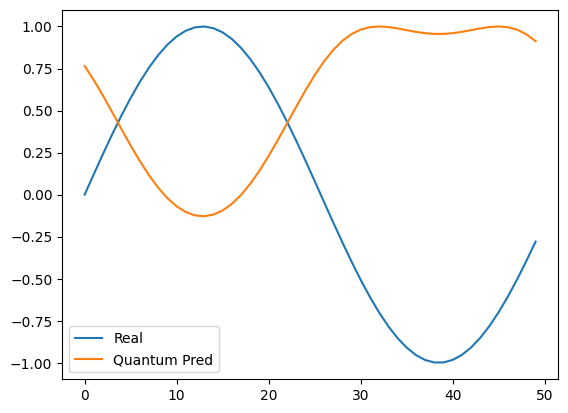

In [62]:
#day 90 QUANTUM STOCK TIME SERIES FORECAST
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def q_predict(x, p):
    qml.RY(x,0)
    qml.RY(p,0)
    return qml.expval(qml.PauliZ(0))

prices = np.sin(np.linspace(0,6,50))
preds = []

param = 0.7

for p in prices:
    preds.append(q_predict(p, param))

rmse = np.sqrt(np.mean((prices-preds)**2))
print("RMSE:", rmse)

plt.plot(prices,label='Real')
plt.plot(preds,label='Quantum Pred')
plt.legend()
plt.show()


In [63]:
#day 91 TSP (3 cities simplified)
from qiskit_aer import Aer
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.measure_all()

sim = Aer.get_backend('qasm_simulator')
res = sim.run(qc, shots=1024).result()

print(res.get_counts())


{'001': 111, '110': 140, '101': 148, '100': 127, '000': 127, '010': 125, '011': 129, '111': 117}


In [64]:
#day 92 QUANTUM FEDERATED LEARNING
import numpy as np

client_weights = [np.random.rand(3) for _ in range(3)]

federated_weights = np.mean(client_weights, axis=0)

print("Clients:")
print(client_weights)
print("Fed Aggregated:", federated_weights)


Clients:
[array([0.16272005, 0.01724026, 0.10689869]), array([0.42256756, 0.15960657, 0.35656607]), array([0.33290654, 0.09002411, 0.2045186 ])]
Fed Aggregated: [0.30606471 0.08895698 0.22266112]


In [65]:
#day 93 NOISE RESILIENT QML
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit_aer import Aer
from qiskit import QuantumCircuit

noise = NoiseModel()
noise.add_all_qubit_quantum_error(depolarizing_error(0.02,1), ['h','x'])

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

sim = Aer.get_backend("qasm_simulator")

noisy = sim.run(qc, noise_model=noise, shots=1024).result()
ideal = sim.run(qc, shots=1024).result()

print("IDEAL:", ideal.get_counts())
print("NOISY:", noisy.get_counts())


IDEAL: {'00': 480, '11': 544}
NOISY: {'11': 536, '00': 488}


In [66]:
#day 94 QUANTUM DSL
def qdsl(code):
    dev = qml.device("default.qubit", wires=2)

    @qml.qnode(dev)
    def run():
        for line in code.split("\n"):
            if line == "H 0": qml.Hadamard(0)
            if line == "X 1": qml.PauliX(1)
            if line == "CNOT 0 1": qml.CNOT([0,1])
        return qml.state()

    return run()

prog = """
H 0
CNOT 0 1
"""

print(qdsl(prog))


[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [67]:
#day 95 XQAI
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def qmodel(x, p):
    qml.RY(x,0)
    qml.RY(p,0)
    return qml.expval(qml.PauliZ(0))

grad = qml.grad(qmodel)

print("Feature Sensitivity:", grad(0.7,0.3))


Feature Sensitivity: ()


/usr/local/lib/python3.12/dist-packages/pennylane/_grad.py:310: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(


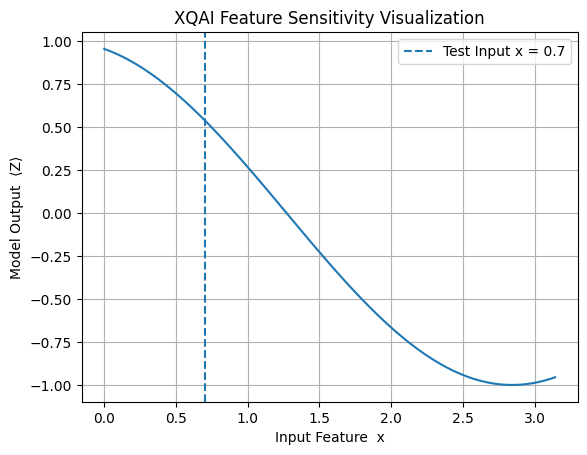

In [68]:
#day 95
import numpy as np
import matplotlib.pyplot as plt

# Sweep input feature x
x_vals = np.linspace(0, np.pi, 100)

# Model predictions
outputs = [qmodel(x, 0.3) for x in x_vals]

# Plot
plt.figure()
plt.plot(x_vals, outputs)
plt.axvline(0.7, linestyle="--", label="Test Input x = 0.7")
plt.xlabel("Input Feature  x")
plt.ylabel("Model Output  ⟨Z⟩")
plt.title("XQAI Feature Sensitivity Visualization")
plt.legend()
plt.grid(True)
plt.show()


In [71]:
#day 79 Quantum Communication + AI Integration
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import partial_trace
from qiskit.quantum_info import Statevector, state_fidelity, DensityMatrix
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
sv = Statevector.from_instruction(qc)
print("Bell Fidelity:", state_fidelity(sv, sv))

# Convert Statevector to DensityMatrix explicitly
rho_total = DensityMatrix(sv)

# Plot Bloch spheres for both qubits directly from the full density matrix
# plot_bloch_multivector automatically extracts single-qubit information.
fig = plot_bloch_multivector(
    rho_total,
    title="Bloch Spheres — Bell Entangled Qubits"
)

plt.show()

Bell Fidelity: 0.9999999999999996


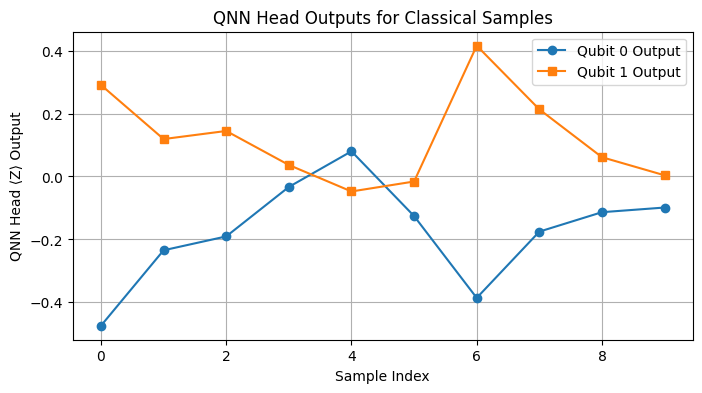

In [78]:
#day 97 Attach a QNN head to classical 2-layer NN and forward pass a sample
# Classical dataset
X = np.random.rand(10, 2)
y = np.random.randint(0,2,10)

# Quantum device
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def qnn_head(inputs, weights):
    qml.AngleEmbedding(inputs, wires=[0,1])
    qml.BasicEntanglerLayers(weights, wires=[0,1])
    return [qml.expval(qml.PauliZ(i)) for i in range(2)]
    import matplotlib.pyplot as plt

# Sample random weights for QNN head
weights = np.random.rand(3,2)

# Forward pass for each sample in X
qnn_outputs = np.array([qnn_head(x, weights) for x in X])

# Plot outputs for the 2 qubits
plt.figure(figsize=(8,4))
plt.plot(qnn_outputs[:,0], 'o-', label='Qubit 0 Output')
plt.plot(qnn_outputs[:,1], 's-', label='Qubit 1 Output')
plt.xlabel("Sample Index")
plt.ylabel("QNN Head ⟨Z⟩ Output")
plt.title("QNN Head Outputs for Classical Samples")
plt.legend()
plt.grid(True)
plt.show()




/tmp/ipython-input-4207308521.py:10: PennyLaneDeprecationWarning: Support for the TensorFlow interface is deprecated and will be removed in v0.44. Future versions of PennyLane are not guaranteed to work with TensorFlow. Please migrate your workflows to JAX or Pytorch to benefit from enhanced support and features.
  outputs.append(np.array([qnn_head(x, weights) for x in X]))


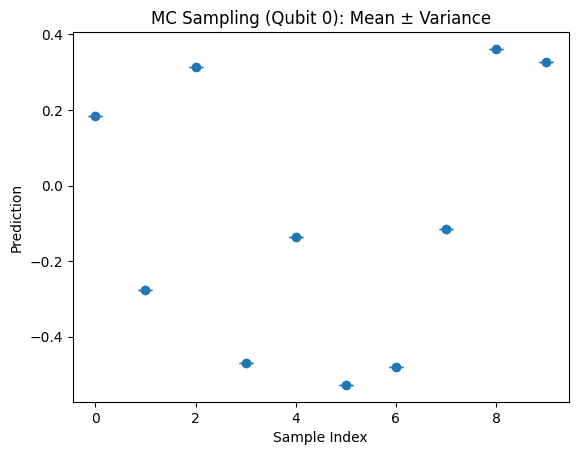

In [84]:
#day 98 Use MC sampling on QNN outputs and plot mean+variance
# Random weights
weights = np.random.rand(3,2)

# Monte Carlo sampling
num_samples = 20
outputs = []

for _ in range(num_samples):
    outputs.append(np.array([qnn_head(x, weights) for x in X]))

outputs = np.array(outputs)
mean_output = outputs.mean(axis=0)
var_output = outputs.var(axis=0)

import matplotlib.pyplot as plt

plt.errorbar(range(len(X)), mean_output[:,0], yerr=var_output[:,0], fmt='o', capsize=5)
plt.title("MC Sampling (Qubit 0): Mean ± Variance")
plt.xlabel("Sample Index")
plt.ylabel("Prediction")
plt.show()


/tmp/ipython-input-3303882824.py:15: PennyLaneDeprecationWarning: Support for the TensorFlow interface is deprecated and will be removed in v0.44. Future versions of PennyLane are not guaranteed to work with TensorFlow. Please migrate your workflows to JAX or Pytorch to benefit from enhanced support and features.
  encoded = [qnn_encode(x_i, weights).numpy() for x_i in X1D]


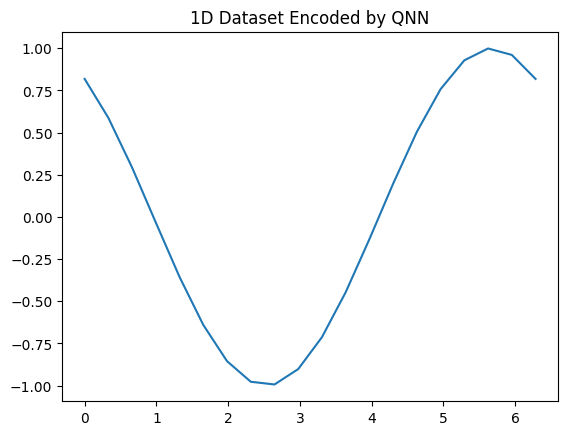

In [85]:
#day 99 Encode 1D dataset with QNN
# 1D dataset
X1D = np.linspace(0, 2*np.pi, 20).reshape(-1,1)

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def qnn_encode(x, w):
    qml.RY(x[0], 0)
    qml.RY(w[0], 0)
    return qml.expval(qml.PauliZ(0))

weights = tf.Variable(np.random.rand(1), dtype=tf.float32)

encoded = [qnn_encode(x_i, weights).numpy() for x_i in X1D]
plt.plot(X1D, encoded)
plt.title("1D Dataset Encoded by QNN")
plt.show()


/tmp/ipython-input-4234102326.py:14: PennyLaneDeprecationWarning: Support for the TensorFlow interface is deprecated and will be removed in v0.44. Future versions of PennyLane are not guaranteed to work with TensorFlow. Please migrate your workflows to JAX or Pytorch to benefit from enhanced support and features.
  output = qnn_grad(x_sample, w)
/tmp/ipython-input-4234102326.py:24: PennyLaneDeprecationWarning: Support for the TensorFlow interface is deprecated and will be removed in v0.44. Future versions of PennyLane are not guaranteed to work with TensorFlow. Please migrate your workflows to JAX or Pytorch to benefit from enhanced support and features.
  outputs = [qnn_grad(x_val, tf.constant([w], dtype=tf.float32)).numpy() for w in w_vals]


Gradient w.r.t QNN parameter: [-0.997495]


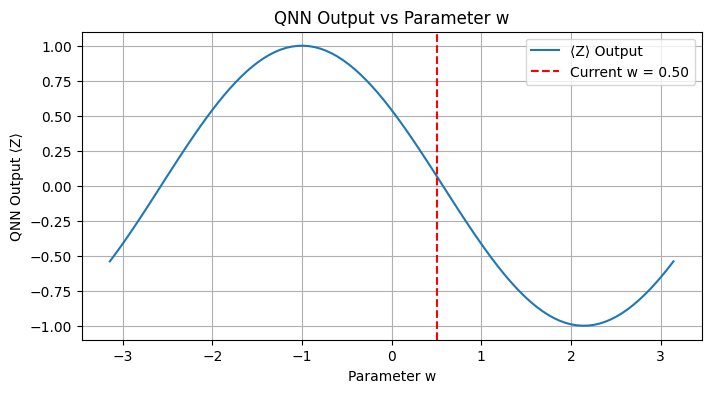

In [87]:
#day 100 Compute gradient w.r.t parameters
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev, interface="tf")
def qnn_grad(x, w):
    qml.RY(x[0],0)
    qml.RY(w[0],0)
    return qml.expval(qml.PauliZ(0))

x_sample = tf.constant([1.0], dtype=tf.float32)
w = tf.Variable([0.5], dtype=tf.float32)

with tf.GradientTape() as tape:
    output = qnn_grad(x_sample, w)
grad = tape.gradient(output, w)
print("Gradient w.r.t QNN parameter:", grad.numpy())
import numpy as np
import matplotlib.pyplot as plt

# Sweep w values around the current parameter
w_vals = np.linspace(-np.pi, np.pi, 100)
x_val = [1.0]

outputs = [qnn_grad(x_val, tf.constant([w], dtype=tf.float32)).numpy() for w in w_vals]

plt.figure(figsize=(8,4))
plt.plot(w_vals, outputs, label="⟨Z⟩ Output")
plt.axvline(w.numpy()[0], color='r', linestyle='--', label=f"Current w = {w.numpy()[0]:.2f}")
plt.xlabel("Parameter w")
plt.ylabel("QNN Output ⟨Z⟩")
plt.title("QNN Output vs Parameter w")
plt.legend()
plt.grid(True)
plt.show()
